# Segunda entrega

En esta segunda entrega vamos a hacer un análisis de reviews en Yelp.

Dado el siguiente dataset https://drive.google.com/file/d/1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE/view?usp=sharing:

In [4]:
#para descargarlo desde colab
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE' -O reviews.csv

--2022-12-14 12:17:34--  https://docs.google.com/uc?export=download&id=1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE
Resolving docs.google.com (docs.google.com)... 172.217.203.102, 172.217.203.101, 172.217.203.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i7825et5adtl4v3asven40lr44mggvbu/1671020250000/14260194928165318342/*/1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE?e=download&uuid=5cbdd20e-115c-4787-aa9d-4f4de2a3f551 [following]
--2022-12-14 12:17:39--  https://doc-10-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i7825et5adtl4v3asven40lr44mggvbu/1671020250000/14260194928165318342/*/1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE?e=download&uuid=5cbdd20e-115c-4787-aa9d-4f4de2a3f551
Resolving doc-10-74-docs.googleusercontent.com (doc-10-74-docs.googleusercontent.com)... 173.194.210.132, 2607:

In [3]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-14 11:59:28.243462: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import classification_report
#from sklearn.metrics import accuracy_score
import spacy
#import os
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
df = pd.read_csv('https://docs.google.com/uc?export=download&id=1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE')
# df = pd.read_csv('CSV/reviews.csv')
df.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2014-02-13,review,0
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2015-10-31,review,0
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,0,UsFtqoBl7naz8AVUBZMjQQ,0,5,2013-11-08,review,0
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,0,UsFtqoBl7naz8AVUBZMjQQ,0,3,2014-03-29,review,0


Deberán hacer un análisis de las reviews.

El análisis no tiene limites y pueden agregar todas las ideas que les surjan, pero como mínimo debe incluir: keywords y tópicos por negocio (business id), sentimiento de cada review, entidades por review, negocio con más comentarios positivos y negocio con más comentarios negativos.

Además, pueden agregar por ejemplo (Opcional): Tópicos asociados sentimientos, keywords asociadas a sentimientos, sentimientos a lo largo del tiempo (utilizando la columna date)...

### Entrega

**Fecha limite**: 26 de Diciembre. 

Deben compartir el notebook con todo el análisis realizado por mail a alexispacek@gmail.com.


### Presentación

**Fecha**: 28 de Diciembre.

La presentación NO debe ser una presentación del notebook. La presentación debe constar de filminas que muestren los **resultados** que obtuvieron, mencionar herramientas que utiliaron, que decisiones tomaron y conclusiones. No deben mostrar nada de código en la presentación.

Una vez que ya hayan presentado (por ejemplo un powerpoint), podemos resolver las dudas que surjan sobre código, etc.



# EDA

Empezamos a conocer: cantidad de filas y columnas, tipos de variables, valores nulos, etc.

In [ ]:
df.shape

(27290, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       27290 non-null  object
 1   review_id     27290 non-null  object
 2   text          27290 non-null  object
 3   votes.cool    27290 non-null  int64 
 4   business_id   27290 non-null  object
 5   votes.funny   27290 non-null  int64 
 6   stars         27290 non-null  int64 
 7   date          27290 non-null  object
 8   type          27290 non-null  object
 9   votes.useful  27290 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.1+ MB


In [ ]:
df.isna().sum()

user_id         0
review_id       0
text            0
votes.cool      0
business_id     0
votes.funny     0
stars           0
date            0
type            0
votes.useful    0
dtype: int64

In [ ]:
df['business_id'].nunique()

1320

In [ ]:
df['stars'].nunique()

5

In [ ]:
df['votes.funny'].nunique()

27

In [ ]:
df['votes.useful'].nunique()

28

In [ ]:
df['type'].nunique()

1

Visualizamos distribución de algunos features

In [7]:
def graficar_countplot(df, features):
    ncount=len(df)    

    for i, feature in enumerate(features):

        plt.figure(figsize=(20,4))
        
        ax = sns.countplot(x=df[feature], order=df[feature].value_counts().iloc[:10].index)
        ax.set_title(f'Countplot {feature}',fontdict={'fontsize': 12,'fontweight':'bold'})
        ax.tick_params(axis='x', rotation=45)
        
        
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate('   {:.2f}% '.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom',rotation=45)
        
        plt.xticks(rotation=90)
        plt.show()

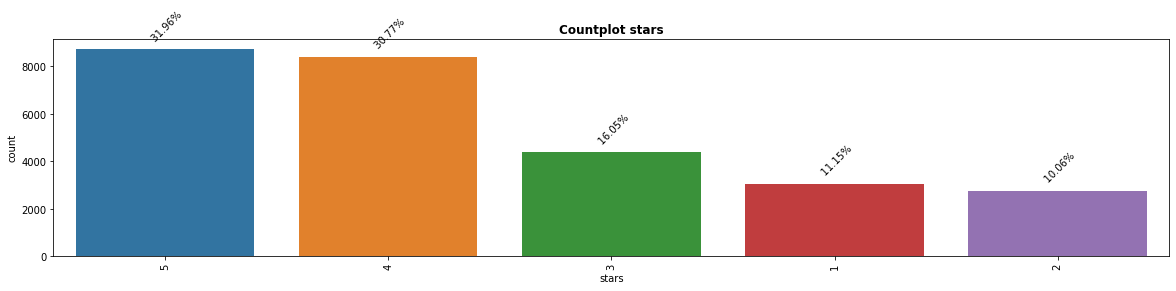

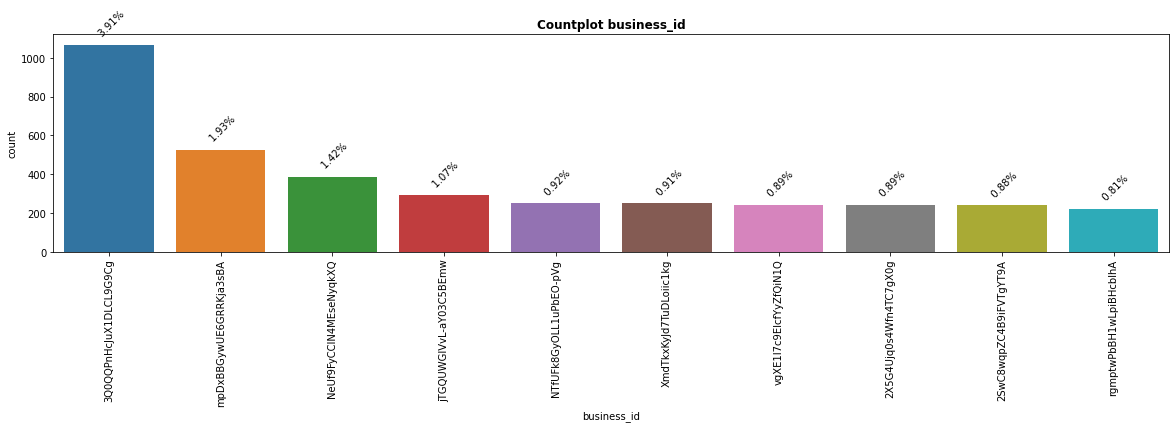

KeyError: ignored

<Figure size 1440x288 with 0 Axes>

In [9]:
features = ['stars','business_id', '']

graficar_countplot(df, features)

Fechas de las Reviews

In [50]:
df['date'].min()

'2005-09-06'

In [52]:
df['date'].max()

'2015-12-24'

In [58]:
df['datetime'] = pd.to_datetime(df['date'])

In [63]:
df['year'] = df.datetime.dt.year

In [62]:
 df.groupby(df.datetime.dt.year).sum()

,votes.cool,votes.funny,stars,votes.useful
datetime,,,,
2005,1,0,13,0
2006,39,40,273,69
2007,190,135,1191,307
2008,538,399,3568,1072
2009,939,700,4136,1749
2010,1140,1054,7258,2657
2011,1593,1491,11955,3623
2012,1372,1293,13354,3296
2013,1416,1208,14654,3254


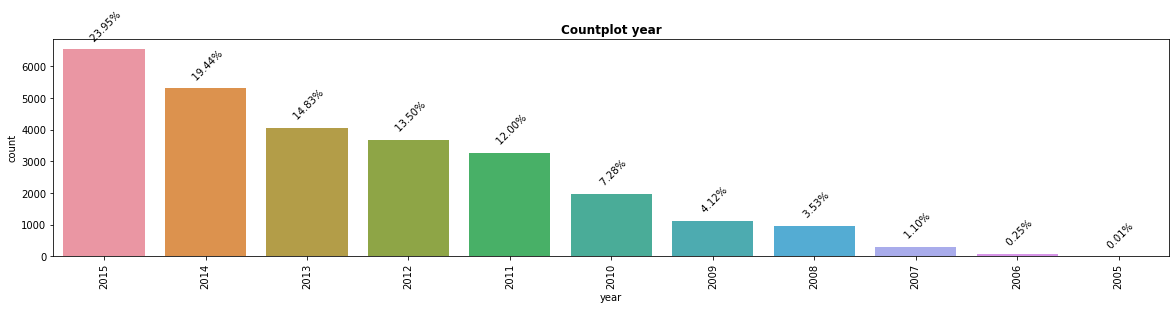

In [69]:
ncount=len(df)  
plt.figure(figsize=(20,4))
        
ax = sns.countplot(x=df['year'], order=df['year'].value_counts().index)
ax.set_title(f'Countplot year',fontdict={'fontsize': 12,'fontweight':'bold'})
ax.tick_params(axis='x', rotation=45)


for p in ax.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax.annotate('   {:.2f}% '.format(100.*y/ncount), (x.mean(), y), 
      ha='center', va='bottom',rotation=45)

plt.xticks(rotation=90)
plt.show()


# Preprocesamiento

Vamos a trabajar con la librería Spacy para limpiar los textos de signos de puntuación y caracteres especiales.

In [10]:
#Instancio nlp
nlp = spacy.load("en_core_web_sm")

In [11]:
def clean_text(text):
  clean_text = []
  for token in nlp(text):
    if (
        not token.is_stop
        and not token.is_punct
        
    ):
        clean_text.append(token.lemma_.lower())

  return " ".join(clean_text)

In [12]:
# Tarda 10 minutos
df['text_clean']=df['text'].astype(str).apply(clean_text)

Visualizamos con una wordcloud la frecuencia de palabras en las reviews.

In [13]:
from wordcloud import WordCloud, STOPWORDS
from scipy import stats

%matplotlib inline
def cloud(data,backgroundcolor = 'black', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

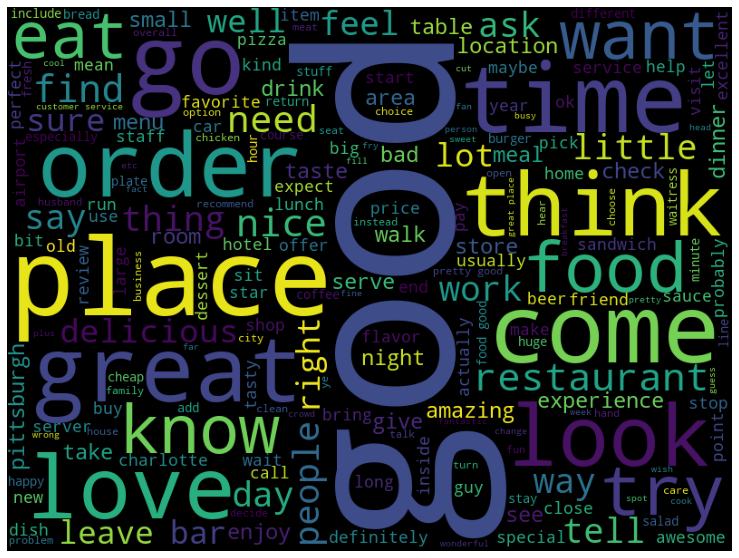

In [14]:
cloud(' '.join(df['text_clean']))

Agregamos stop words????

In [ ]:
# nlp.Defaults.stop_words.add("test")

✅ Visualizamos la frecuencia de palabras y las clases del target.

In [15]:
import plotly.express as px

In [16]:
# tardo 3 minutos
FreqOfWords = df['text_clean'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top 200 palabras más frecuentes',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

### NER

Named entity recognition (NER) es una técnica de NLP que automáticamente identifica entidades en un texto y las clasifica en alguna categoría predefinida.

 Una entidad puede ser:
- Nombres de personas
- Organizaciones
- Ubicaciones
- Fechas
- Cantidades
- Valores monetarios
- Porcentajes
- Y más..

Comenzaremos viendo como podemos extraer entidades de un texto con spacy.

Primero que nada debemos importar spacy y cargar el modelo que querramos usar, en este caso, inglés.

Definir una función que recibiendo un texto (str), retorne un listado de entidades (solo el nombre de la entidad, es decir, .text)

In [17]:
def get_entities(text:str):
  doc=nlp(text)
  ents = []
  if doc.ents: 
    for ent in doc.ents:
      ents.append(ent.text)
      
  return ents

In [18]:
df["NER"] = df["text_clean"].apply(get_entities)

La siguiente celda, sirve para que cuando imprimamos un dataframe, pandas nos muestre el texto entero y no lo corte con "..."

In [ ]:
pd.options.display.max_colwidth = 10000

In [49]:
df[['text', 'NER']].sample(10)

,text,NER
5448,"Burritos are huge! Margaritas are good, and t...",[]
22301,After driving by everyday for months I finally...,"[everyday month, 10]"
6790,Reviewing the taco stand out front: the tacos ...,"[review taco, $ 3 dollar]"
1261,Great food! I have been eating at Pierogies P...,[]
16067,There is usually a wait but not too bad. Parki...,[zuppa toscana]
14191,A very unique breakfast place with great crepe...,"[pittsburgh, 3 4 foot, 30 minute, 30]"
9944,"2.0/5 - tikka masala: great sauce, dry chicken...","[2.0/5, 3.0/5, naan]"
14300,"Mmmmmm, great Chinese food here! My dad and ...","[mmmmmm great, chinese, rick, chinese, chinese..."
8474,The gallery is right above the Wood Street T/B...,"[year, year]"
25300,Great place I've been in north Carolina for 3 ...,"[north carolina, 3 year, japanese, 8]"


EXPLODE.

En pandas, la función .explode() nos permite transformar una filas de un dataset que tienen una lista (como nuestra columna NER) en muchas filas (una por elemento en la lista).

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html

Aplicarla a nuestra columna NER pero sin modificar el df original, guardar el resultado en otro df.


In [20]:
df_exploded = df.explode("NER")
df_exploded.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,text_clean,NER
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,hoagie
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,30 year ago old
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,fashioned menu board
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,70
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,italian


Ahora, agrupando por NER podemos obtener cuáles son las entidades que aparecen más frecuentemente en estas reviews... 

Obtener el top 20 de entidades más frecuentes.

In [71]:
# NER que más aparecieron
# df_exploded.groupby("NER").count().sort_values(by="text_clean", ascending=False).head(20)

¿que hacemos con los numeros? ¿los sacamos???

In [22]:
df_exploded[['review_id','NER']].groupby("NER").count().sort_values(by="review_id", ascending=False).head(20)

,review_id
NER,
pittsburgh,2580
2,1532
italian,1510
3,1334
5,1259
night,1115
4,1049
second,999
half,875


Entidades por review

In [79]:
df_exploded.groupby('review_id').agg({'NER':'count'}).sort_values(by="NER", ascending=False).head(20)

,NER
review_id,
il2_VZrOfaOGWdoKOexafg,47
y1CRMEM3CUiq_QfYQprTaQ,44
gmP92zchkhe2BsWMgD8ZvA,42
ZBCU0lepUid9L9eONElWOw,39
geP98FFSfzaM6OfswlaHng,37
iSM4_uPt5ZEgVkgFPS0DTQ,36
ty-a__E7jrTxe34PyoUFvw,35
rHogJ02dqRKBgBFS7Lkheg,34
h3vo9HuYfIU3SGrqgS49vw,34


In [81]:
df_exploded.groupby('review_id').agg({'NER':'count'}).sort_values(by="NER", ascending=True).head(20) # poner where distinto a cero

,NER
review_id,
--6l_R7iIwZ2MjhtbThL2w,0
8zytxOFEgWcwqJH494pD1w,0
HB5RDU8mnnTuORaCXY4d5w,0
HB76jxtVj0mcZtfI4wVOJA,0
S86j8dstjDdOWY4ThXsqBQ,0
8z0tDlmK7VHKU0jby1ueiQ,0
grgTn1v8t_VxLBgWaJXo7Q,0
8ywOhAxGIc_nW4P6kecV5Q,0
HBZXOEAxMD7QMVrsVzeEuw,0


In [ ]:
il2_VZrOfaOGWdoKOexafg	47
y1CRMEM3CUiq_QfYQprTaQ	44
gmP92zchkhe2BsWMgD8ZvA	42
ZBCU0lepUid9L9eONElWOw	39
geP98FFSfzaM6OfswlaHng	37

In [136]:
mask = (df_exploded.review_id == 'il2_VZrOfaOGWdoKOexafg') | (df_exploded.review_id == 'y1CRMEM3CUiq_QfYQprTaQ') | (df_exploded.review_id == 'gmP92zchkhe2BsWMgD8ZvA') | (df_exploded.review_id == 'ZBCU0lepUid9L9eONElWOw') | (df_exploded.review_id == 'geP98FFSfzaM6OfswlaHng')

In [150]:
a = df_exploded[ mask ]
#b = df_exploded[df_exploded.review_id == 'y1CRMEM3CUiq_QfYQprTaQ']['NER']
#c = df_exploded[df_exploded.review_id == 'gmP92zchkhe2BsWMgD8ZvA']['NER']
#d = df_exploded[df_exploded.review_id == 'ZBCU0lepUid9L9eONElWOw']['NER']
#e = df_exploded[df_exploded.review_id == 'geP98FFSfzaM6OfswlaHng']['NER']

In [185]:
grouped = a[['NER','review_id']].groupby('NER', sort=True).count().reset_index()

grouped = grouped.rename(columns={'review_id':'cantidad'})

grouped.sort_values('cantidad', ascending=False).head(20)

,NER,cantidad
94,ho ho,11
123,night,7
69,cherry house,6
9,100,3
147,summer,3
140,season,3
105,joe,3
126,north carolina,3
70,chinese,3
88,friday,3


pandas.core.series.Series

Top 20 de entidades más frecuentes por negocio.

In [ ]:
# Cantidad de NER por negocio.
df_exploded.groupby("business_id").agg({'NER':'count'}).sort_values(by="NER", ascending=False).head(20)

,NER
business_id,
3Q0QQPnHcJuX1DLCL9G9Cg,1907
mpDxBBGywUE6GRRKja3sBA,1107
NeUf9FyCCIN4MEseNyqkXQ,1105
XmdTkxKyJd7TuDLoiic1kg,920
rgmptwPbBH1wLpiBHcbIhA,871
n9iK0s1dKxv5JLi3u1eTkQ,813
2SwC8wqpZC4B9iFVTgYT9A,778
9SPwF-vRgtuHxciFxv5YLA,760
NTfUFk8GyOLL1uPbEO-pVg,692


In [ ]:
# df_exploded.groupby(['business_id','NER']).count().sort_values(by="NER", ascending=False).head(20)

df_exploded.groupby(['business_id','NER'])['NER'].count()


business_id             NER                 
--UE_y6auTgq3FXlvUMkbw  1                       2
                        1 day                   1
                        1.75                    1
                        10                      5
                        10 12 minute            1
                                               ..
zxodsuIjtv3kx8mNa3sptQ  tomorrow                1
                        victoria   fantastic    1
                        week half week          1
                        year half               1
                        yesterday               1
Name: NER, Length: 49566, dtype: int64

# Part of speech

POS es el proceso mediante el cual vamos a clasificar a las palabras de un texto en categorías gramaticales. Para esto, los modelos se basan no solo en la palabra en sí, sino también en su contexto. Es decir, buscamos identificar sustantivos, verbos, adjetivos, etc dentro de un texto. 

Al igual que NER, para identificar POS en palabras de un texto, podemos utilizar los modelos de spacy que funcionan muy bien.

Veamos un ejemplo:

Definir una función que dado un texto, retorne una lista de todos sus sustantivos. En caso de que no contenga sustantivos, debe retornar lista vacia.

In [23]:
def get_nouns(text):
  doc = nlp(text)
  nouns = []
  for token in doc:
    if token.pos_ == "NOUN":
      nouns.append(token.text)
  return nouns

In [24]:
df["NOUNS"] = df["text_clean"].apply(get_nouns)

Hacemos un explode, como hicimos con los NER

In [25]:
df_exploded_nouns = df.explode("NOUNS")
df_exploded_nouns.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,text_clean,NER,NOUNS
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,"[hoagie, 30 year ago old, fashioned menu board...",year
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,"[hoagie, 30 year ago old, fashioned menu board...",menu
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,"[hoagie, 30 year ago old, fashioned menu board...",selection
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,"[hoagie, 30 year ago old, fashioned menu board...",food
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,"[hoagie, 30 year ago old, fashioned menu board...",speciality


In [26]:
# NOUNS por negocio.
df_exploded_nouns.groupby("business_id").agg({'NOUNS':'count'}).sort_values(by="NOUNS", ascending=False).head(20)

,NOUNS
business_id,
3Q0QQPnHcJuX1DLCL9G9Cg,19730
mpDxBBGywUE6GRRKja3sBA,11323
2SwC8wqpZC4B9iFVTgYT9A,8076
XmdTkxKyJd7TuDLoiic1kg,7591
NeUf9FyCCIN4MEseNyqkXQ,7406
jTGQUWGIVvL-aY03C5BEmw,6628
n9iK0s1dKxv5JLi3u1eTkQ,6351
rgmptwPbBH1wLpiBHcbIhA,6247
9SPwF-vRgtuHxciFxv5YLA,5917


In [27]:
# NOUNS más repetidos.
df_exploded_nouns.groupby("NOUNS").count().sort_values(by="text_clean", ascending=False).head(20)

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,text_clean,NER
NOUNS,,,,,,,,,,,,
food,14678,14678,14678,14678,14678,14678,14678,14678,14678,14678,14678,14678
place,14096,14096,14096,14096,14096,14096,14096,14096,14096,14096,14096,14096
time,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660
service,8796,8796,8796,8796,8796,8796,8796,8796,8796,8796,8796,8796
order,8723,8723,8723,8723,8723,8723,8723,8723,8723,8723,8723,8723
restaurant,5585,5585,5585,5585,5585,5585,5585,5585,5585,5585,5585,5585
price,4960,4960,4960,4960,4960,4960,4960,4960,4960,4960,4960,4960
people,4445,4445,4445,4445,4445,4445,4445,4445,4445,4445,4445,4445
thing,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209,4209


# Noun chunks

Spacy también nos permite extraer "noun chunks" de un texto.
Noun chunks son sustantivos en conjunto con cualquier palabra que dependa de ellos o los acompañe.

Crear una función que dado un texto retorne un listado de noun chunks. Luego aplicar la función al dataframe y almacenar resultados en la columna "NOUN_CHUNKS"

In [28]:
def get_noun_chunks(text:str):
  doc = nlp(text)
  return [nc for nc in doc.noun_chunks]

In [29]:
df["NOUN_CHUNKS"] = df["text_clean"].apply(get_noun_chunks)

In [30]:
df.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,text_clean,NER,NOUNS,NOUN_CHUNKS
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,"[hoagie, 30 year ago old, fashioned menu board...","[year, menu, selection, food, speciality, vote...","[(mr, hoagie, institution), (30, year, ago, ol..."
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2014-02-13,review,0,excellent food superb customer service miss ma...,[superb],"[food, superb, customer, service, place, tradi...","[(excellent, food, superb, customer, service, ..."
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2015-10-31,review,0,yes place little date open weekend staff pleas...,"[weekend, year]","[date, weekend, staff, order, spot, veggie, ic...","[(little, date, open, weekend, staff), (fast, ..."
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,0,UsFtqoBl7naz8AVUBZMjQQ,0,5,2013-11-08,review,0,food great good thing wing wing simply fantast...,"[monday, wednesday, 0.75, dream pittsburgh]","[food, thing, wing, wing, salt, wing, wing, ni...","[(food, great, good, thing, wing, wing), (seas..."
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,0,UsFtqoBl7naz8AVUBZMjQQ,0,3,2014-03-29,review,0,check place past monday wing night hear wing g...,[past monday],"[place, wing, night, wing, decide, time, check...","[(place), (monday, wing, night), (wing), (grea..."


In [31]:
df_exploded_nouns_chunks = df.explode("NOUN_CHUNKS")
df_exploded_nouns_chunks.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,text_clean,NER,NOUNS,NOUN_CHUNKS
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,"[hoagie, 30 year ago old, fashioned menu board...","[year, menu, selection, food, speciality, vote...","(mr, hoagie, institution)"
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,"[hoagie, 30 year ago old, fashioned menu board...","[year, menu, selection, food, speciality, vote...","(30, year, ago, old, fashioned, menu, board, b..."
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,"[hoagie, 30 year ago old, fashioned menu board...","[year, menu, selection, food, speciality, vote...","(burger, patty)"
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,"[hoagie, 30 year ago old, fashioned menu board...","[year, menu, selection, food, speciality, vote...","(frozen, ingredient, fresh, overall, good, alt..."
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2014-02-13,review,0,excellent food superb customer service miss ma...,[superb],"[food, superb, customer, service, place, tradi...","(excellent, food, superb, customer, service, m..."


# Text blob

Para análisis de sentimientos, podemos entrenar nuestros propios modelos (como la clase pasada) o utilizar modelos ya entrenados (textblob, modelos de proveedores cloud como aws, azure, gcp, etc).

En este caso utilizaremos textblob.

In [35]:
from textblob import TextBlob

Escribir una función get_sentiment que dado un texto, nos retorne:
- la palabra "POS" si polarity > 0.1
- la palabra "NEU" si polarity ≥ -0.1 & polarity ≤ 0.1
- la palabra "NEG" si polarity < -0.1

Luego aplicarla a todo el df y almacenar resultados en la columna "SENTIMENT"

In [36]:
def get_sentiment(text):
  sent = TextBlob(text).sentiment.polarity

  if sent > 0.1:
    return "POS"
  
  if sent >= -0.1 and sent <= 0.1:
    return "NEU"

  if sent < 0.1:
    return "NEG"

In [37]:
df["SENTIMENT"] = df["text_clean"].apply(get_sentiment)

In [38]:
df.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,text_clean,NER,NOUNS,NOUN_CHUNKS,SENTIMENT
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 y...,"[hoagie, 30 year ago old, fashioned menu board...","[year, menu, selection, food, speciality, vote...","[(mr, hoagie, institution), (30, year, ago, ol...",POS
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2014-02-13,review,0,excellent food superb customer service miss ma...,[superb],"[food, superb, customer, service, place, tradi...","[(excellent, food, superb, customer, service, ...",POS
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,0,5UmKMjUEUNdYWqANhGckJw,0,5,2015-10-31,review,0,yes place little date open weekend staff pleas...,"[weekend, year]","[date, weekend, staff, order, spot, veggie, ic...","[(little, date, open, weekend, staff), (fast, ...",POS
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,0,UsFtqoBl7naz8AVUBZMjQQ,0,5,2013-11-08,review,0,food great good thing wing wing simply fantast...,"[monday, wednesday, 0.75, dream pittsburgh]","[food, thing, wing, wing, salt, wing, wing, ni...","[(food, great, good, thing, wing, wing), (seas...",POS
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,0,UsFtqoBl7naz8AVUBZMjQQ,0,3,2014-03-29,review,0,check place past monday wing night hear wing g...,[past monday],"[place, wing, night, wing, decide, time, check...","[(place), (monday, wing, night), (wing), (grea...",NEU


Cuantos reviews asociadas a sentimientos (POS, NEU, NEG)

In [267]:
df_copy = df[['SENTIMENT','user_id']].copy()
df_copy = df_copy.rename(columns = {'user_id' : 'cantidad'})
a = df_copy.groupby("SENTIMENT").count()
a

,cantidad
SENTIMENT,
NEG,1903
NEU,4917
POS,20470


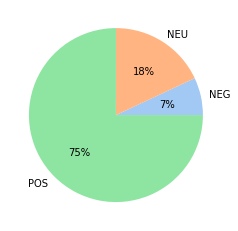

In [268]:
data = a.cantidad
labels = ['NEG','NEU','POS']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [263]:
type(labels)

pandas.core.indexes.base.Index

1) Cuántas ORACIONES hay asociadas a cada sentimiento (POS, NEG, NEU) ?

In [40]:
# df.groupby("SENTIMENT").agg({"SENTENCES": "sum"})

# df.groupby("SENTIMENT").agg({"text_clean": "sum"})

,text_clean
SENTIMENT,
NEG,fiancé upgrade phone apple store get strange t...
NEU,check place past monday wing night hear wing g...
POS,mr hoagie institution walk like throwback 30 y...


2) Cuáles son los 10 sustantivos más negativos? Y los más positivos? (Noun)

aplicar expresion regular.....

In [290]:
import re

txt = "The rain in Spain"
x = re.search(r"(\w+)+", txt)
print(x)

<re.Match object; span=(0, 3), match='The'>


In [193]:
noun_sentiments = df[df['nouns']].explode("NOUNS").groupby(["NOUNS", "SENTIMENT"], as_index=False).agg({"text_clean": "count"})
noun_sentiments.head(20)

,NOUNS,SENTIMENT,text_clean
0,$,NEG,4
1,$,NEU,8
2,$,POS,21
3,+,NEU,6
4,+,POS,12
5,+0,POS,2
6,+1,POS,8
7,+10,NEU,1
8,+35,POS,1
9,-$$,POS,1


In [43]:
noun_sentiments[noun_sentiments.SENTIMENT == "NEG"].sort_values(by="text_clean", ascending=False).head(10)

,NOUNS,SENTIMENT,text_clean
9977,food,NEG,927
17032,order,NEG,807
25286,time,NEG,772
22004,service,NEG,751
18446,place,NEG,686
6661,customer,NEG,327
15633,minute,NEG,317
17920,people,NEG,316
9081,experience,NEG,309
6843,day,NEG,283


In [197]:
noun_sentiments[noun_sentiments.SENTIMENT == "POS"].sort_values(by="text_clean", ascending=False).head(10)

,NOUNS,SENTIMENT,text_clean
9979,food,POS,10896
18448,place,POS,10831
25288,time,POS,8276
22006,service,POS,6397
17034,order,POS,5893
20621,restaurant,POS,4321
19128,price,POS,3857
23523,staff,POS,3242
14513,love,POS,3213
2003,bar,POS,3201


Negocio con más comentarios positivos

In [212]:
df[df.SENTIMENT == "POS"][['SENTIMENT','business_id', 'text_clean']].groupby(['business_id', 'SENTIMENT']).count().sort_values(by="text_clean", ascending=False).head(20)

,,text_clean
business_id,SENTIMENT,
3Q0QQPnHcJuX1DLCL9G9Cg,POS,740
mpDxBBGywUE6GRRKja3sBA,POS,389
NeUf9FyCCIN4MEseNyqkXQ,POS,273
jTGQUWGIVvL-aY03C5BEmw,POS,259
NTfUFk8GyOLL1uPbEO-pVg,POS,230
2SwC8wqpZC4B9iFVTgYT9A,POS,217
2X5G4Ujq0s4Wfn4TC7gX0g,POS,214
XmdTkxKyJd7TuDLoiic1kg,POS,210
vgXE1I7c9ElcfYyZfQiN1Q,POS,201


Negocios con más comentarios negativos

In [213]:
df[df.SENTIMENT == "NEG"][['SENTIMENT','business_id', 'text_clean']].groupby(['business_id', 'SENTIMENT']).count().sort_values(by="text_clean", ascending=False).head(20)

,,text_clean
business_id,SENTIMENT,
3Q0QQPnHcJuX1DLCL9G9Cg,NEG,76
vKtMsWeAaThimXGo9Ic_Og,NEG,35
eThu9hCL8NOjOxswQ-cFSg,NEG,28
wHi8ODv7TGmeUB02XoX-mA,NEG,26
mpDxBBGywUE6GRRKja3sBA,NEG,25
NeUf9FyCCIN4MEseNyqkXQ,NEG,24
sbW8qHJgzEIH42B0S-3New,NEG,19
ym9QwkmB5ZKTyj7q5huTDw,NEG,17
9mwShpTgZofOujt4JfyGmw,NEG,17


,user_id,review_id,text,votes.cool,business_id,votes.funny,date,type,votes.useful,text_clean,NER,NOUNS,NOUN_CHUNKS,SENTIMENT,datetime,year
stars,,,,,,,,,,,,,,,,
1,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044,3044
2,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746,2746
3,4380,4380,4380,4380,4380,4380,4380,4380,4380,4380,4380,4380,4380,4380,4380,4380
4,8398,8398,8398,8398,8398,8398,8398,8398,8398,8398,8398,8398,8398,8398,8398,8398
5,8722,8722,8722,8722,8722,8722,8722,8722,8722,8722,8722,8722,8722,8722,8722,8722


Sentimientos a lo largo del tiempo

In [222]:
df_copy = df[(df.SENTIMENT == 'POS') & (df.business_id == '3Q0QQPnHcJuX1DLCL9G9Cg')].copy()

In [226]:
df_copy.shape

(740, 17)

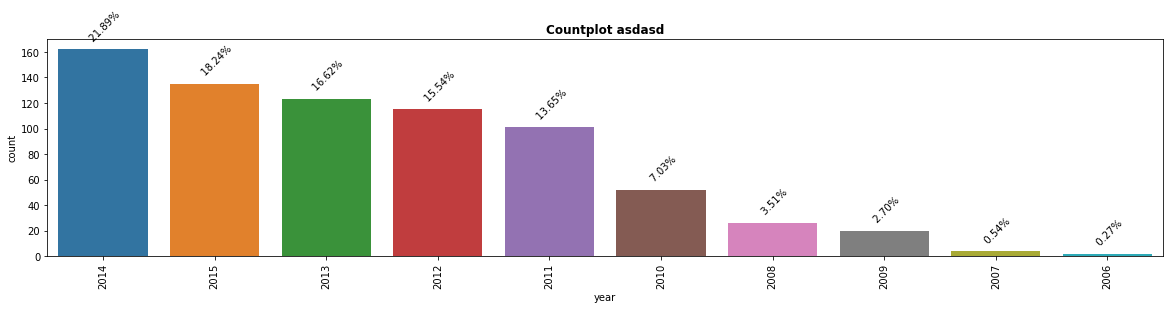

In [232]:
ncount=len(df_copy)    

plt.figure(figsize=(20,4))

ax = sns.countplot(x=df_copy['year'], order=df_copy['year'].value_counts().iloc[:10].index)
ax.set_title(f'Countplot asdasd',fontdict={'fontsize': 12,'fontweight':'bold'})
ax.tick_params(axis='x', rotation=45)


for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('   {:.2f}% '.format(100.*y/ncount), (x.mean(), y), 
        ha='center', va='bottom',rotation=45)

plt.xticks(rotation=90)
plt.show()

Puntuaciones de las reviews

In [236]:
df[['stars','text']].groupby("stars").count()

,text
stars,
1,3044
2,2746
3,4380
4,8398
5,8722


Negocios con 5 estrellas.

In [239]:
df[df['stars'] == 5].groupby('business_id').agg({'stars':'count'}).sort_values(by="stars", ascending=False).head(10)

,stars
business_id,
mpDxBBGywUE6GRRKja3sBA,175
3Q0QQPnHcJuX1DLCL9G9Cg,142
CChwRoYVXA3QZulS8a6xOQ,121
2Igiyhi82R8_QaaPplRmCw,120
2X5G4Ujq0s4Wfn4TC7gX0g,116
vgXE1I7c9ElcfYyZfQiN1Q,102
jTGQUWGIVvL-aY03C5BEmw,98
r8jeeS3k_diihMDSu9IjlA,90
2SwC8wqpZC4B9iFVTgYT9A,89


Negocios con 1 estrella.

In [240]:
df[df['stars'] == 1].groupby('business_id').agg({'stars':'count'}).sort_values(by="stars", ascending=False).head(10)

,stars
business_id,
3Q0QQPnHcJuX1DLCL9G9Cg,79
eThu9hCL8NOjOxswQ-cFSg,67
vKtMsWeAaThimXGo9Ic_Og,60
wHi8ODv7TGmeUB02XoX-mA,41
mpDxBBGywUE6GRRKja3sBA,36
NeUf9FyCCIN4MEseNyqkXQ,36
9mwShpTgZofOujt4JfyGmw,29
MCFxbw9hQYejyvg59T44TA,23
n9iK0s1dKxv5JLi3u1eTkQ,21


# KeyBERT

Ahora vamos a analizar las keywords.

In [46]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.8 MB/s 
     |████████████████████████████████| 237 kB 12.3 MB/s 
     |████████████████████████████████| 51 kB 6.4 MB/s 
     |████████████████████████████████| 5.8 MB 53.8 MB/s 
     |████████████████████████████████| 1.3 MB 46.6 MB/s 
     |████████████████████████████████| 182 kB 43.4 MB/s 
     |████████████████████████████████| 7.6 MB 53.0 MB/s 
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23800 sha256=c85dd6eeeeed5d2f99a127173b1ad47ab97980c6d1e70b423b1fb7a58ca6bfe6
  Stored in directory: /root/.cache/pip/wheels/6c/bc/8b/a51bee77aec33895e6c8c236144b4cc10875659c4d2c80f070
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=6e9c4a9fcc336370871d95b95c04b621cb3001803fb1394458b9d9ed8a75d9dc
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88

In [47]:
from keybert import KeyBERT

kw_model = KeyBERT()

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

- Top n: Cantidad de keywords por review
- keyphrase_ngram_range: Cantidad de palabras por keyword (keyphrase)

In [48]:
df["KEYWORDS"] = df['text_clean'].apply(lambda x: kw_model.extract_keywords(x, top_n=3, keyphrase_ngram_range=(1,1)))

KeyboardInterrupt: ignored

In [ ]:
df.head()

Podemos ver que además de la keyword, nos trae un score para cada keyword.

Vamos a eliminar el score y quedarnos únicamente con las kw:

In [ ]:
df["KEYWORDS"] = df.KEYWORDS.apply(lambda keywords: [k[0] for k in keywords])

In [ ]:
df.head()

Ahora podemos ver la popularidad de las keywords:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))
sns.countplot(x=df.explode("KEYWORDS").KEYWORDS, 
              order=df.explode("KEYWORDS").KEYWORDS.value_counts().index[:30],
              palette='Reds_r')
plt.title("KEYWORDS popularity - TOP 30")
plt.xticks(rotation=45)
plt.show()

# BERTopic

Ahora utilizaremos BERTopic para extraer tópicos.

In [ ]:
from bertopic import BERTopic

In [ ]:
topic_model = BERTopic(calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df["text_clean"].values)

In [ ]:
topics_data = topic_model.get_topic_info()
topics_data

El topico -1 corresponde a outliers.

In [ ]:
df["TOPIC_ID"] = topics
df = df.merge(topics_data, left_on="TOPIC_ID", right_on="Topic", how="left")
df = df.rename(columns={"Name": "TOPIC_NAME", "Count": "TOPIC_POPULARITY"})
df = df.drop(["Topic"], axis=1)
df.head(3)

In [ ]:
topic_model.visualize_topics()